# Red Wine Classifier

In this notebook I will explore the red wine dataset, create a classifier to identify good and poor wines from their features, and finally determine the features that weight the most to determine the quality of the wine. I start importing the needed libraries. 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.feature_selection as fs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [72]:
path='winequality-red.csv'

In [73]:
df=pd.read_csv(path,',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


I will make some check of the dataset to determine if there are missing values and if the variables have the right type. 

In [74]:
df.isnull().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


In [75]:
df.isna().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


In [76]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

I will make now some descriptive statistics to better understand the features of the dataset. 

In [135]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


Some histogram will help to visualize how the feature values are distributed. I will then produce a good histogram of the counts of wines of different quality scores. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa48ef13250>,
      dtype=object)

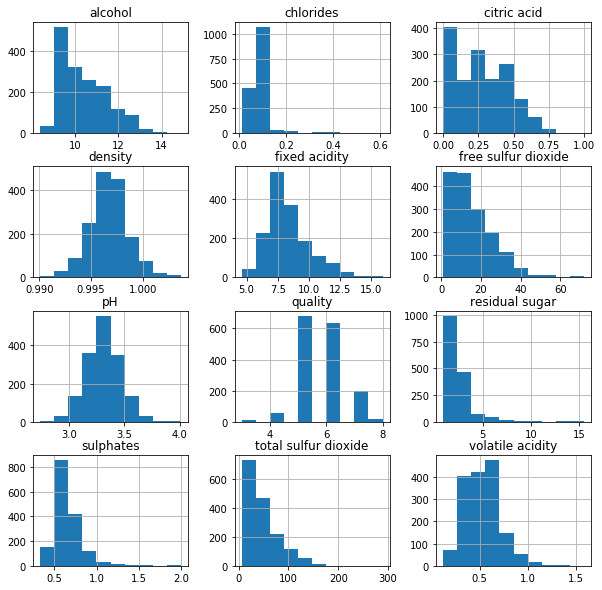

In [78]:
df.hist(figsize=(10,10))

Text(0, 0.5, 'counts')

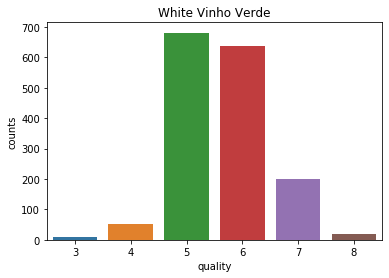

In [79]:
sns.countplot(df['quality'])
plt.title('White Vinho Verde')
plt.xlabel('quality')
plt.ylabel('counts')

I will now concentrate on correlation among variables. I will start from a correlation matrix, to then inspect in more depth the variables that shows an high level of correlation to identify if there are some strange behaviours. This inspection will be held using scatterplots, that shows indeed some expected weak correlations. 

In [80]:
col=df.columns.to_list()
col.remove('quality')
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [136]:
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1,-0.55,0,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1,0.14,0.2,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0,0.14,1,0.06,0.19,0.2,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.2,0.06,1,0.01,0.05,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.2,0.05,0.67,1,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.2,-0.02,0.07,1,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1,-0.2,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.2,1,0.09,0.25


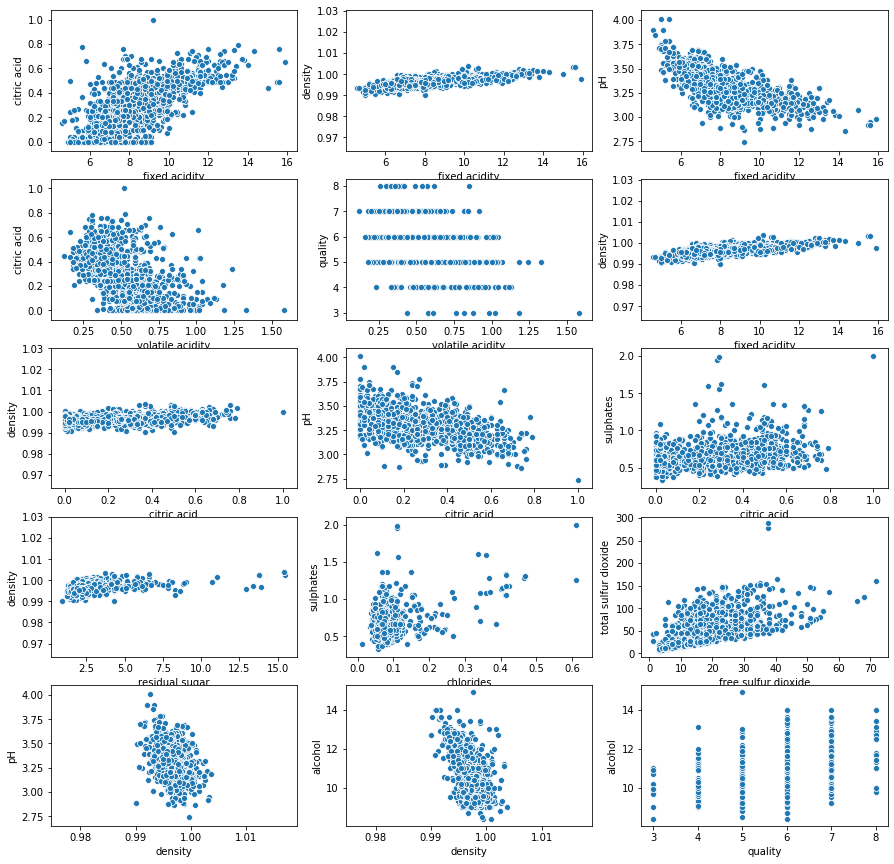

In [82]:
f, axes = plt.subplots(5, 3,figsize=(15,15))

sns.scatterplot(x='fixed acidity',y='citric acid',data=df, ax=axes[0][0])
sns.scatterplot(x='fixed acidity',y='density',data=df, ax=axes[0][1])
sns.scatterplot(x='fixed acidity',y='pH',data=df, ax=axes[0][2])
sns.scatterplot(x='volatile acidity',y='citric acid',data=df, ax=axes[1][0])
sns.scatterplot(x='volatile acidity',y='quality',data=df, ax=axes[1][1])
sns.scatterplot(x='fixed acidity',y='density',data=df, ax=axes[1][2])
sns.scatterplot(x='citric acid',y='density',data=df, ax=axes[2][0])
sns.scatterplot(x='citric acid',y='pH',data=df, ax=axes[2][1])
sns.scatterplot(x='citric acid',y='sulphates',data=df, ax=axes[2][2])
sns.scatterplot(x='residual sugar',y='density',data=df, ax=axes[3][0])
sns.scatterplot(x='chlorides',y='sulphates',data=df, ax=axes[3][1])
sns.scatterplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df, ax=axes[3][2])
sns.scatterplot(x='density',y='pH',data=df, ax=axes[4][0])
sns.scatterplot(x='density',y='alcohol',data=df, ax=axes[4][1])
sns.scatterplot(x='quality',y='alcohol',data=df, ax=axes[4][2])



Finally, some boxplots could give some hints on which variables are more related with a change in quality.

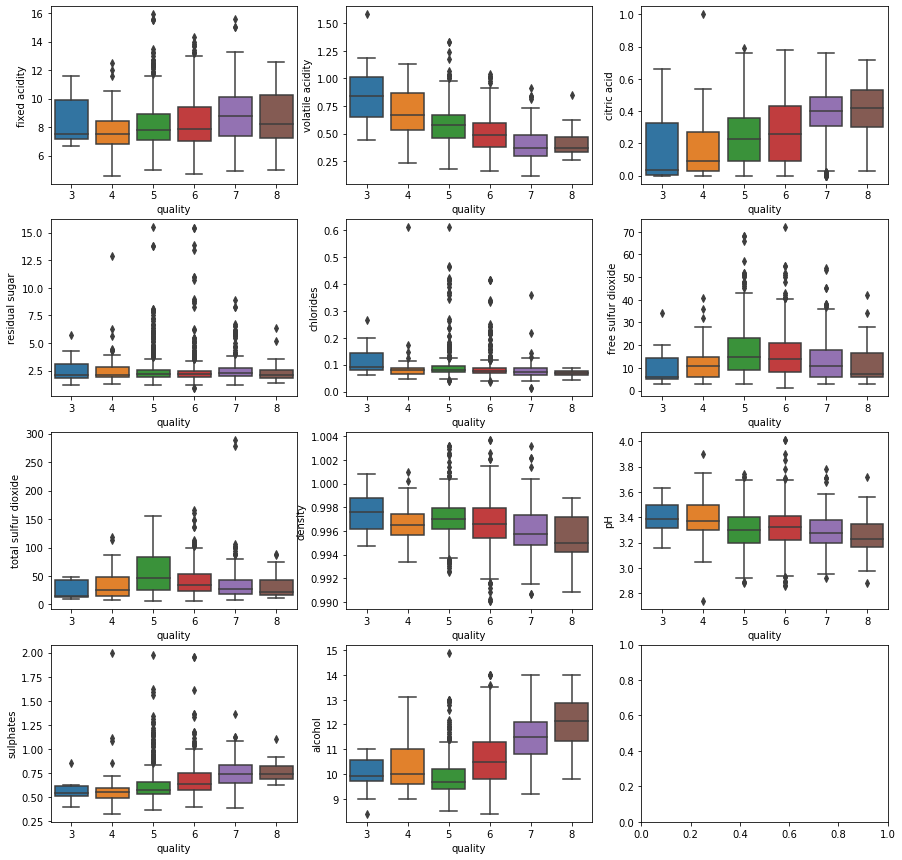

In [83]:
f, axes = plt.subplots(4, 3,figsize=(15,15))

i=0
j=0

for item in col:
    sns.boxplot(x='quality',y=item,data=df, ax=axes[i][j])
    if j != 2 :
        j=j+1
    else:
        i=i+1
        j=0


From this plot some features seems more informative than others. Let's proceed with a feature selection, then. 

## Feature Importance

In [155]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=df[['quality']]

In [156]:
FS=fs.f_classif(X, y)
ffss=pd.DataFrame(FS)
ffss.round(2).head()
ffss.columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
ffss.round(2).head()

/home/IT043026/anaconda2/envs/python3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.28,60.91,19.69,1.05,6.04,4.75,25.48,13.4,4.34,22.27,115.85
1,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.0,0.00,0.00,0.00


From this results we can see that the features affect the quality in different ways. All the results have a low p-value, so there is significance in this findings, but residual sugar. 

I will carry on the classification using all the features and then only the features with an F value higher than 20, at a significant level, to see the difference in scores, that I guess to be low. 

## Classification Job

Let's start assigning to wine with quality score higher or equal to 6 the label 'good' and to the others the label 'poor'.

In [201]:
a=[]
for element in df['quality']:
    if element > 6:
        a.append('good')
    else:
        a.append('poor')
df['rating']=a

In [202]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,poor
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor


In [203]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')

I will now select all the features and scale them.

In [204]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [205]:
y=a

In [206]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

Now I split the dataset in train and test.

In [207]:
X_train_all, X_test, y_train_all, y_test = train_test_split( X, y, test_size=0.2, random_state=500)


In order to select the best K for KNN, I will split again the train part of the dataset in train and evaluation part. 

In [208]:
X_train, X_eval, y_train, y_eval = train_test_split( X_train_all, y_train_all, test_size=0.2, random_state=100)


In [209]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_eval)
    mean_acc[n-1] = metrics.accuracy_score(y_eval, yhat)

    
    std_acc[n-1]=np.std(yhat==y_eval)/np.sqrt(yhat.shape[0])

mean_acc

array([0.890625  , 0.8359375 , 0.8671875 , 0.85546875, 0.86328125,
       0.85546875, 0.859375  , 0.859375  , 0.8671875 , 0.8515625 ,
       0.86328125, 0.8515625 , 0.87109375, 0.8828125 ])

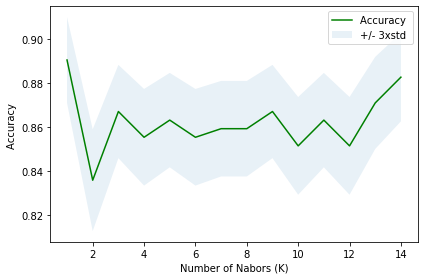

In [210]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [211]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.890625 with k= 1


Using now the original train and test split, I will train 4 classifiers using KNN with K=1, Decision Tree, SVM and Logistic Regression. For each algorithm I will compute the significant metrics using the test dataset. 

In [212]:
k = 1
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train_all,y_train_all)
KNN
yhat_KNN=KNN.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=['good','poor'])
cnf_matrix

array([[ 26,  21],
       [ 23, 250]])

In [213]:
Jall=[]
F1all=[]
LLall=[]
Jall.append(metrics.jaccard_score(y_test,yhat_KNN, average='weighted'))
F1all.append(metrics.f1_score(y_test, yhat_KNN, average='weighted'))
LLall.append(np.nan)
print(Jall[0],F1all[0])

0.78 0.8636795343137255


In [214]:
DT = DecisionTreeClassifier()
DT.fit(X_train_all,y_train_all) 
yhat_DT=DT.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=['good','poor'])
cnf_matrix

array([[ 20,  27],
       [ 17, 256]])

In [215]:
Jall.append(metrics.jaccard_score(y_test,yhat_DT, average='weighted'))
F1all.append(metrics.f1_score(y_test, yhat_DT, average='weighted'))
LLall.append(np.nan)
print(Jall[1],F1all[1])

0.7738984375 0.8555519869818431


In [216]:
SVM_ = svm.SVC()
SVM_.fit(X_train_all, y_train_all) 
yhat_SVM=SVM_.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=['good','poor'])
cnf_matrix

array([[ 14,  33],
       [  9, 264]])

In [217]:
Jall.append(metrics.jaccard_score(y_test,yhat_SVM, average='weighted'))
F1all.append(metrics.f1_score(y_test, yhat_SVM, average='weighted'))
LLall.append(np.nan)
print(Jall[2],F1all[2])

0.7727481617647058 0.8490131578947369


In [218]:
LR = LogisticRegression()
LR.fit(X_train_all, y_train_all) 
yhat_LR=LR.predict(X_test)
ypro_LR=LR.predict_proba(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=['good','poor'])
cnf_matrix

array([[ 15,  32],
       [ 17, 256]])

In [219]:
Jall.append(metrics.jaccard_score(y_test,yhat_LR, average='weighted'))
F1all.append(metrics.f1_score(y_test, yhat_LR, average='weighted'))
LLall.append(metrics.log_loss(y_test,ypro_LR))
print(Jall[3],F1all[3],LLall[3])

0.7504894018954917 0.8343849421241453 0.3080156948846873


I now restrict my interest only to the features selected as most important. 

In [220]:
X_fs=df[['volatile acidity','total sulfur dioxide','sulphates','alcohol']]
X_fs

,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,0.700,34.0,0.56,9.4
1,0.880,67.0,0.68,9.8
2,0.760,54.0,0.65,9.8
3,0.280,60.0,0.58,9.8
4,0.700,34.0,0.56,9.4
...,...,...,...,...
1594,0.600,44.0,0.58,10.5
1595,0.550,51.0,0.76,11.2
1596,0.510,40.0,0.75,11.0
1597,0.645,44.0,0.71,10.2


In [221]:
y=a
X_fs= preprocessing.StandardScaler().fit(X_fs).transform(X_fs)
X_fs[0:5]

array([[ 0.96187667, -0.37913269, -0.57920652, -0.96024611],
       [ 1.96744245,  0.62436323,  0.1289504 , -0.58477711],
       [ 1.29706527,  0.22904665, -0.04808883, -0.58477711],
       [-1.38444349,  0.41150046, -0.46118037, -0.58477711],
       [ 0.96187667, -0.37913269, -0.57920652, -0.96024611]])

In [222]:
X_train_all, X_test, y_train_all, y_test = train_test_split( X_fs, y, test_size=0.2, random_state=1000)

In [223]:
X_train, X_eval, y_train, y_eval = train_test_split( X_train_all, y_train_all, test_size=0.2, random_state=200)


In [224]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_eval)
    mean_acc[n-1] = metrics.accuracy_score(y_eval, yhat)

    
    std_acc[n-1]=np.std(yhat==y_eval)/np.sqrt(yhat.shape[0])

mean_acc

array([0.859375  , 0.82421875, 0.8671875 , 0.8515625 , 0.890625  ,
       0.8828125 , 0.8984375 , 0.8828125 , 0.8984375 , 0.91015625,
       0.90625   , 0.90625   , 0.90625   , 0.8984375 ])

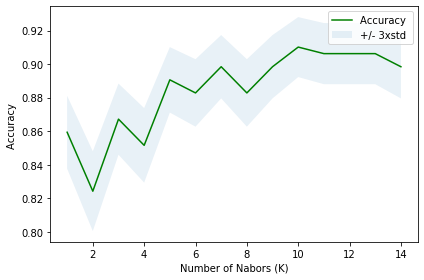

In [225]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [226]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.91015625 with k= 10


In [227]:
k = 10
#Train Model and Predict  
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train_all,y_train_all)
KNN
yhat_KNN=KNN.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=['good','poor'])
cnf_matrix

array([[ 17,  30],
       [  6, 267]])

In [228]:
Jfs=[]
F1fs=[]
LLfs=[]

Jfs.append(metrics.jaccard_score(y_test,yhat_KNN, average='weighted'))
F1fs.append(metrics.f1_score(y_test, yhat_KNN, average='weighted'))
LLfs.append(np.nan)
print(Jfs[0],F1fs[0])

0.7988744629179899 0.8705827067669173


In [229]:
DT = DecisionTreeClassifier()
DT.fit(X_train_all,y_train_all) 
yhat_DT=DT.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=['good','poor'])
cnf_matrix

array([[ 26,  21],
       [ 17, 256]])

In [230]:
Jfs.append(metrics.jaccard_score(y_test,yhat_DT, average='weighted'))
F1fs.append(metrics.f1_score(y_test, yhat_DT, average='weighted'))
LLfs.append(np.nan)
print(Jfs[1],F1fs[1])

0.8025251116071427 0.8790429292929293


In [231]:
SVM_ = svm.SVC()
SVM_.fit(X_train_all, y_train_all) 
yhat_SVM=SVM_.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=['good','poor'])
cnf_matrix

array([[ 12,  35],
       [  3, 270]])

In [232]:
Jfs.append(metrics.jaccard_score(y_test,yhat_SVM, average='weighted'))
F1fs.append(metrics.f1_score(y_test, yhat_SVM, average='weighted'))
LLfs.append(np.nan)
print(Jfs[2],F1fs[2])

0.7831193181818181 0.8538920359415114


In [233]:
LR = LogisticRegression()
LR.fit(X_train_all, y_train_all) 
yhat_LR=LR.predict(X_test)
ypro_LR=LR.predict_proba(X_test)
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=['good','poor'])
cnf_matrix

array([[  9,  38],
       [  4, 269]])

In [234]:
Jfs.append(metrics.jaccard_score(y_test,yhat_LR, average='weighted'))
F1fs.append(metrics.f1_score(y_test, yhat_LR, average='weighted'))
LLfs.append(metrics.log_loss(y_test,ypro_LR))
print(Jfs[3],F1fs[3],LLfs[3])

0.7638310951390201 0.8354094827586207 0.3054788921887628


Finally I construct the table with the final score results.

In [235]:
algo=['KNN','DT','SVM','LogR']
res=pd.DataFrame(algo)
res.columns=['Algo']
res['Jaccard']=Jall
res['Jaccard FS']=Jfs
res['F1 Score']=F1all
res['F1 Score FS']=F1fs
res['Logloss']=LLall
res['Logloss FS']=LLfs
res.head()

,Algo,Jaccard,Jaccard FS,F1 Score,F1 Score FS,Logloss,Logloss FS
0,KNN,0.780000,0.798874,0.863680,0.870583,NaN,NaN
1,DT,0.773898,0.802525,0.855552,0.879043,NaN,NaN
2,SVM,0.772748,0.783119,0.849013,0.853892,NaN,NaN
3,LogR,0.750489,0.763831,0.834385,0.835409,0.308016,0.305479


In [236]:
res.round(2).head()

,Algo,Jaccard,Jaccard FS,F1 Score,F1 Score FS,Logloss,Logloss FS
0,KNN,0.78,0.80,0.86,0.87,NaN,NaN
1,DT,0.77,0.80,0.86,0.88,NaN,NaN
2,SVM,0.77,0.78,0.85,0.85,NaN,NaN
3,LogR,0.75,0.76,0.83,0.84,0.31,0.31
